# Exercise 1 : Conversion from Celsius to Fahrenheit (Simple Regression Analysis)

The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

$$ f = c \times 1.8 + 32 $$


Of course, it would be simple enough to create a conventional Python function that directly performs this calculation, but that wouldn't be machine learning.


Instead, we will give TensorFlow some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100).
Then, we will train a model that figures out the above formula through the training process. This is a _simple regression analysis_ problem.

## Import dependencies

First, import TensorFlow. Here, we're calling it `tf` for ease of use. We also tell it to only display errors.

Next, import [NumPy](http://www.numpy.org/) as `np`. Numpy helps us to represent our data as highly performant lists.

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
print(tf.__version__)
import numpy as np

2.7.1


In [14]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Set up training data

As we saw before, supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs. Since the task in this exercise is to create a model that can give the temperature in Fahrenheit when given the degrees in Celsius, we create two lists `celsius_q` and `fahrenheit_a` that we can use to train our model.

In [103]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


### Some Machine Learning terminology

 - **Feature** — The input(s) to our model. In this case, a single value — the degrees in Celsius.

 - **Labels/response variable** — The output our model predicts. In this case, a single value — the degrees in Fahrenheit. In a classification setting, we would predict labels (discrete classes), in a regression setting, we predict a continuous response variable, such as Fahrenheit.

 - **Example** — A pair of inputs/outputs used during training. In our case a pair of values from `celsius_q` and `fahrenheit_a` at a specific index, such as `(22,72)`.



## 1. Define the Network

Next create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of units in the layer. The number of units defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)


In [104]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

This model has just a single layer, `l0`.

In [105]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [106]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 2. Compile the network, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.


In [81]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

`TensorFlow` uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (`0.1` in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

## 3. Fit the model

Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [82]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## 4. Evaluate the Model - Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`.

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.



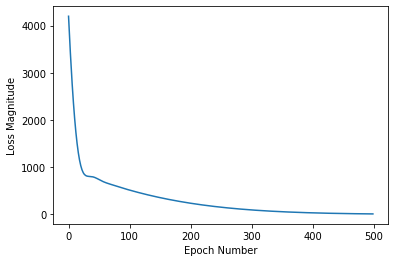

In [83]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## 5. Use the model to predict values

Now you have a model that has been trained to learn the relationship between `celsius_q` and `fahrenheit_a`. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

So, for example, if the Celsius value is 100, what do you think the Fahrenheit result will be? Take a guess before you run this code.

In [84]:
print(model.predict([100.0]))

[[211.31021]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)




## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [85]:
print("These are the layer variables: {}".format(model.get_weights()))

These are the layer variables: [array([[1.8242955]], dtype=float32), array([28.880667], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We can show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

### A little experiment

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [86]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74742]]
Model predicts that 100 degrees Celsius is: [[211.74742]] degrees Fahrenheit
These are the l0 variables: [array([[0.5968949 , 0.02139384, 0.01172368, 0.35185102]], dtype=float32), array([ 3.484818 , -3.0073252, -2.7715163,  3.010582 ], dtype=float32)]
These are the l1 variables: [array([[ 0.20319672, -0.41102245,  0.7771168 , -0.7402758 ],
       [-0.7281887 ,  0.9473572 , -0.15004049,  0.12950596],
       [-0.96478873,  0.05949384, -0.2531712 ,  0.72464406],
       [-0.10805991, -0.88057184,  1.0134443 , -0.15393376]],
      dtype=float32), array([ 1.8714209, -3.126011 ,  3.3828623, -2.6109185], dtype=float32)]
These are the l2 variables: [array([[ 0.23399544],
       [-0.9353689 ],
       [ 1.1917399 ],
       [-0.6491724 ]], dtype=float32), array([3.2284596], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the `l0` and `l1` layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.



# Exercise 2 : O-Rings seen with Logistic Regression

This notebook calculates a logistic regression using Keras. It's basically meant to show the principles of Keras.

###  Datset

We investigate the data set of the challenger flight with broken O-rings (`Y=1`
) vs start temperature.

Text(0, 0.5, 'Broken O-rings')

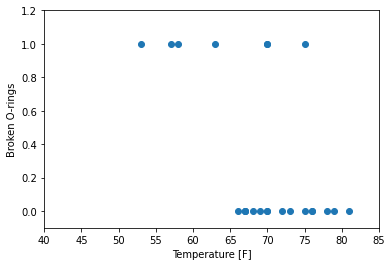

In [87]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
import tempfile
data = np.asarray(pd.read_csv('./challenger.txt', sep=','), dtype='float32')
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])
plt.xlabel('Temperature [F]')
plt.ylabel('Broken O-rings')

In [88]:
y_values = data[:,1]
print(y_values)

[0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]


## Mathematical Notes

We are considering the likelihood $P(y_i=1|x_i)$ for the class $y_i=1$ given the $i-$th data point $x_i$ ($x_i$ could be a vector). This is given by:

$
P(y_i=1 | x_i) = \frac{e^{(b +  x_i w)}}{1 + e^{(b + x_i w)}} = [1 + e^{-(b + x_i w)}]^{-1}
$

If we have more than one data point, which we usually do, we have to apply the equation above to each of the N data points. In this case we can use a vectorized version with $x=(x_1,x_2,\ldots,x_N)$ and $y=(y_1,y_2,\ldots,y_N$)

### Numpy code
This numpy code, shows the calculation for one value using `NumPy` (like a single forward pass)

In [89]:
# Data
N = len(data)
x = data[:,0]
y = data[:,1]
# Initial Value for the weights
w = -0.20
b = 20.0
# predicted probabilities 
p_1 = 1 / (1 + np.exp(-x*w - b))
# cross-entropy loss function
cross_entropy = -np.mean(y * np.log(p_1) + (1-y) * np.log(1-p_1))
print(cross_entropy)
print(np.round(p_1,3))

3.882916
[0.999 0.998 0.998 0.998 0.999 0.996 0.996 0.998 1.    0.999 0.998 0.988
 0.999 1.    0.999 0.993 0.998 0.978 0.992 0.985 0.993 0.992 1.   ]


## Better values from intuition

Now lets try to find better values for $W$ and $b$. Lets assume $W$ is given with $-1$. We want the probability
for a dammage $P(y_i=1 | x_i)$ to be $0.5$.
Determine an appropriate value for $b$.
Hint: at which $x$ value should $P(y_i=1 | x_i)$ be $0.5$, look at the data. At this $x$ value the term $1 + e^{-(b + W’ x_i)}$ must be $2$.

**Solution**

$P(y=1 | x) = 0.5$ at $x \approx 65$ 

$-(b + (-1) x_i) = 0 \rightarrow b = 65$  

0.9094435
[0.269 0.007 0.018 0.047 0.119 0.001 0.    0.007 1.    0.881 0.007 0.
 0.119 1.    0.119 0.    0.007 0.    0.    0.    0.    0.    0.999]


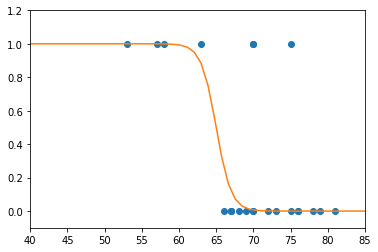

In [90]:
w_val = -1
b_val = 65
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])
x_pred = np.linspace(40,85)
x_pred = np.resize(x_pred,[len(x_pred),1])
y_pred = 1 / (1 + np.exp(-x_pred*w_val - b_val))
plt.plot(x_pred, y_pred)

# predicted probabilities
p_1 = 1 / (1 + np.exp(-x*w_val - b_val))

# cross-entropy loss function
cross_entropy = -np.mean(y * np.log(p_1) + (1-y) * np.log(1-p_1))
                         
print(cross_entropy)
print(np.round(p_1,3))

We can see that the value of the cross-entropy has decreased from 3.882916 to 0.9094435.

## TODO : determine the accuracy of this logistic regression model

In [91]:
y_pred = np.round(p_1, decimals=0).astype('int')
accuracy = np.mean(y==y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8695652173913043


## TODO : set up a Keras model

If there are two labels, we use `binary_crossentropy` as loss function. In this case, we use `sigmoid` as output layer.

In [92]:
l0 = tf.keras.layers.Dense(units=1, activation = tf.nn.sigmoid, input_shape=[1])
model = tf.keras.Sequential([l0])
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
model.fit(x, y, epochs=10000, verbose=False)

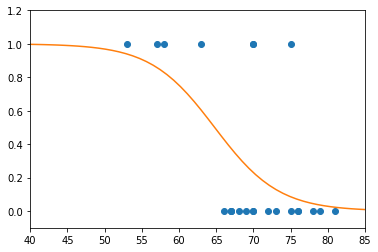

In [93]:
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])
x_pred = np.linspace(40,85)
x_pred = np.resize(x_pred,[len(x_pred),1])
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred)

In [94]:
print(model.get_weights())

[array([[-0.23217289]], dtype=float32), array([15.043545], dtype=float32)]


Cross-entropy:  0.4416346
Accuracy:  0.8695652173913043


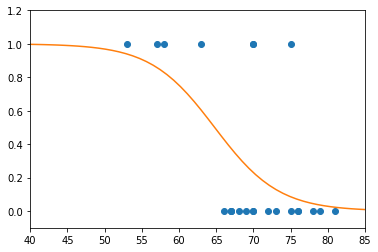

In [95]:
w_val = model.get_weights()[0]
b_val = model.get_weights()[1]
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])
x_pred = np.linspace(40,85)
x_pred = np.resize(x_pred,[len(x_pred),1])
y_pred = 1 / (1 + np.exp(-x_pred*w_val - b_val))
plt.plot(x_pred, y_pred)

# predicted probabilities
p_1 = 1 / (1 + np.exp(-x*w_val - b_val))

# cross-entropy loss function
cross_entropy = -np.mean(y * np.log(p_1) + (1-y) * np.log(1-p_1))
print("Cross-entropy: ", cross_entropy)
y_pred = np.round(p_1, decimals=0).astype('int')
accuracy = np.mean(y==y_pred)
print("Accuracy: ", accuracy)

In [96]:
model.evaluate(x, y)

1/1 [==============================] - 0s 118ms/step - loss: 0.4416 - accuracy: 0.8696


[0.4416346251964569, 0.8695651888847351]

The value of the cross-entropy loss function could be decreased from 0.9094435 to 0.4416346251964569

# Exercise 3 : MNIST and Multinomial Logistic Regression

In this exercise we use multinomial logistic regression to predict the number of the handwritten digits of the MNIST dataset.

## TODO : read MNIST data and compute validation accuracy for a multinomial logistic regression model, see [Multinomial Logistic Regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression)

If there are several labels, then we use `categorical_crossentropy` as loss function and the output layer should be a `softmax` layer.

In [97]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# One-hot-encoded label vector
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax, batch_input_shape=(None, 784)))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, 
                    y_train_cat, 
                    epochs=10, 
                    validation_data=(X_test, y_test_cat))

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 320.4593 - accuracy: 0.8417 - val_loss: 242.9400 - val_accuracy: 0.8801
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 257.2356 - accuracy: 0.8691 - val_loss: 381.1338 - val_accuracy: 0.8126
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 246.9380 - accuracy: 0.8741 - val_loss: 225.4031 - val_accuracy: 0.8802
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 238.4442 - accuracy: 0.8784 - val_loss: 312.3720 - val_accuracy: 0.8513
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 238.5885 - accuracy: 0.8783 - val_loss: 195.5100 - val_accuracy: 0.9018
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 238.2655 - accuracy: 0.8773 - val_loss: 253.4705 - val_accuracy: 0.8795
Epoch 7/10
1875/1875 [=========================

In [98]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 263.0470 - accuracy: 0.8765
Accuracy on test dataset: 0.8765000104904175


## TODO : use different regularization terms, see [Keras Regularizer](https://keras.io/regularizers/)

In [99]:
# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# One-hot-encode label vector
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define Network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(10, 
                                activation=tf.nn.softmax, 
                                batch_input_shape=(None, 784), 
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Compile Network
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Fit Network
history = model.fit(X_train, 
                    y_train_cat, 
                    epochs=10, 
                    validation_data=(X_test, y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 338.3148 - accuracy: 0.8376 - val_loss: 217.6844 - val_accuracy: 0.8881
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 287.3254 - accuracy: 0.8573 - val_loss: 281.7627 - val_accuracy: 0.8726
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 288.3959 - accuracy: 0.8602 - val_loss: 320.5165 - val_accuracy: 0.8475
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 296.8785 - accuracy: 0.8590 - val_loss: 222.1539 - val_accuracy: 0.8899
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 283.6608 - accuracy: 0.8618 - val_loss: 460.9875 - val_accuracy: 0.8016
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 277.9357 - accuracy: 0.8639 - val_loss: 245.5682 - val_accuracy: 0.8875
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 287.6865 - accuracy: 0.8610 - val_lo

In [100]:
# Evaluate Network
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 484.2548 - accuracy: 0.7784
Accuracy on test dataset: 0.7784000039100647


# Exercise 4 : Prediction of House Prices

In this exercise, we’ll attempt to predict the median price of homes in a given Boston
suburb in the mid-1970s, given data points about the suburb at the time, such as the
crime rate, the local property tax rate, and so on. The dataset has relatively few data points: only
506, split between 404 training samples and 102 test samples. And each feature in the
input data (for example, the crime rate) has a different scale. For instance, some values
are proportions, which take values between 0 and 1, others take values between 1
and 12, others between 0 and 100, and so on.

### Loading the Boston housing dataset

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

65536/57026 [==================================] - 0s 0us/step


Let’s look at the data:

In [2]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


As you can see, we have 404 training samples and 102 test samples, each with 13
numerical features, such as per capita crime rate, average number of rooms per dwelling,
accessibility to highways, and so on.
The targets are the median values of owner-occupied homes, in thousands of dollars:

In [2]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

The prices are typically between 10000 and 50000 USD. If that sounds cheap, remember
that this was the mid-1970s, and these prices aren’t adjusted for inflation.

### Preparing the data

It would be problematic to feed into a neural network values that all take wildly different ranges. The model might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice for dealing with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in NumPy.

### Normalizing the data

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Note that the quantities used for normalizing the test data are computed using the
training data. You should never use any quantity computed on the test data in your
workflow, even for something as simple as data normalization.

### Building your model

Because so few samples are available, we’ll use a very small model with two intermediate layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small model is one way to mitigate overfitting.

#### Model definition

In [4]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

The model ends with a single unit and no activation (it will be a linear layer). This is a
typical setup for scalar regression (a regression where you’re trying to predict a single
continuous value). Applying an activation function would constrain the range the output
can take; for instance, if you applied a sigmoid activation function to the last layer,
the model could only learn to predict values between 0 and 1. Here, because the last
layer is purely linear, the model is free to learn to predict values in any range.
Note that we compile the model with the `mse` loss function — _mean squared error_, the
square of the difference between the predictions and the targets. This is a widely used
loss function for regression problems.
We’re also monitoring a new metric during training: _mean absolute error_ (`MAE`). It’s the
absolute value of the difference between the predictions and the targets. For instance, an
MAE of 0.5 on this problem would mean your predictions are off by 500 on average.

### Validating your approach using K-fold validation

To evaluate our model while we keep adjusting its parameters (such as the number of
epochs used for training), we could split the data into a training set and a validation set, as we did in the previous examples. But because we have so few data points, the validation set would end up being very small (for instance, about 100 examples). As a consequence, the validation scores might change a lot depending on which data points we chose for validation and which we chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent us from reliably evaluating our model.

The best practice in such situations is to use $K$-fold cross-validation. It consists of splitting the available data into K partitions (typically $K = 4$ or $5$), instantiating $K$ identical models, and training each one on $K - 1$ partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the $K$ validation scores obtained. In terms of code, this is straightforward.

#### K-fold validation

In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    # Prepares the validation data: data from partition k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    # Prepares the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],axis=0)
    # Builds the Keras model (already compiled)
    model = build_model()
    # Trains the model (in silent mode, verbose=0)
    history=model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


Running this with `num_epochs = 100` yields the following results:

In [6]:
all_scores

[1.9184445142745972,
 2.4037296772003174,
 2.4944815635681152,
 2.4431681632995605]

In [7]:
np.mean(all_scores)

2.3149559795856476

The different runs do indeed show rather different validation scores, from 1.9 to 2.49.
The average (2.3) is a much more reliable metric than any single score—that’s the
entire point of K-fold cross-validation. In this case, we’re off by 2310 USD on average, which is significant considering that the prices range from 10000 to 50000.
Let’s try training the model a bit longer: 500 epochs. To keep a record of how well
the model does at each epoch, we’ll modify the training loop to save the per-epoch
validation score log for each fold.

#### Saving the validation logs at each fold

In [8]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    # Prepares the validation data: data from partition #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    # Prepares the training data: data from all other partitions
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],axis=0)
    # Builds the Keras model (already compiled)
    model = build_model()
    # Trains the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


We can then compute the average of the per-epoch MAE scores for all folds.

#### Building the history of successive mean K-fold validation scores

In [9]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores

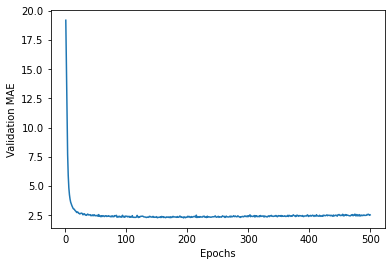

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

It may be a little difficult to read the plot, due to a scaling issue: the validation MAE
for the first few epochs is dramatically higher than the values that follow. Let’s omit
the first 10 data points, which are on a different scale than the rest of the curve.

#### Plotting validation scores, excluding the first 10 data points

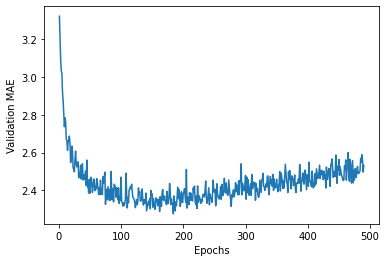

In [16]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

As you can see in Figure above, validation MAE stops improving significantly after
120–140 epochs (this number includes the 10 epochs we omitted). Past that point,
we start overfitting.
Once you’re finished tuning other parameters of the model (in addition to the
number of epochs, you could also adjust the size of the intermediate layers), you can
train a final production model on all of the training data, with the best parameters,
and then look at its performance on the test data.

#### Training the final model 

In [18]:
# Gets a fresh, compiled model
model = build_model()
# Trains it on the entirety of the data
model.fit(train_data, train_targets,
epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 17.8865 - mae: 2.7644


Here’s the final result:

In [19]:
test_mae_score

2.7643771171569824

We’re still off by a bit under 2800 USD. It’s an improvement! Just like with the two previous tasks, you can try varying the number of layers in the model, or the number  of units per layer, to see if you can squeeze out a lower test error.

### Generating predictions on new data
When calling `predict()` on our binary classification model, we retrieved a scalar score between 0 and 1 for each input sample. With our multiclass classification model, we retrieved a probability distribution over all classes for each sample. Now, with this scalar regression model, `predict()` returns the model’s guess for the sample’s price in thousands of dollars:

In [20]:
predictions = model.predict(test_data)
predictions[0]

array([8.708372], dtype=float32)

The first house in the test set is predicted to have a price of about 8700 USD.